In [1]:
#%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pylab as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
from utils.embedding import lis, layers, data_prepare, embedding, get_lines, isclose
from utils.geometry import *
from shapely.geometry import Point, LineString, Polygon, LinearRing

In [4]:
chip_1, chip_2, connections = data_prepare()

In [5]:
new_points, subsequences = layers(chip_1, chip_2, connections)

In [6]:
"""
plt.figure(figsize=[10, 10])

for i in embedding(connections, subsequences[0], subsequences[1], chip_1, chip_2)[0]:
    plt.plot(i[0],i[1], 'o-', color='g')

for i in embedding(connections, subsequences[0], subsequences[1], chip_1, chip_2)[1]:
    plt.plot(i[0],i[1], 'o-', color='r')
"""

"\nplt.figure(figsize=[10, 10])\n\nfor i in embedding(connections, subsequences[0], subsequences[1], chip_1, chip_2)[0]:\n    plt.plot(i[0],i[1], 'o-', color='g')\n\nfor i in embedding(connections, subsequences[0], subsequences[1], chip_1, chip_2)[1]:\n    plt.plot(i[0],i[1], 'o-', color='r')\n"

In [7]:
"""
plt.figure(figsize=[10, 10])

for i in embedding(connections, subsequences[2], subsequences[3], chip_1, chip_2)[0]:
    plt.plot(i[0],i[1], 'o-', color='b')
    

for i in embedding(connections, subsequences[2], subsequences[3], chip_1, chip_2)[1]:
    plt.plot(i[0],i[1], 'o-', color='y')
"""

"\nplt.figure(figsize=[10, 10])\n\nfor i in embedding(connections, subsequences[2], subsequences[3], chip_1, chip_2)[0]:\n    plt.plot(i[0],i[1], 'o-', color='b')\n    \n\nfor i in embedding(connections, subsequences[2], subsequences[3], chip_1, chip_2)[1]:\n    plt.plot(i[0],i[1], 'o-', color='y')\n"

In [19]:
internal, external = get_lines(connections, subsequences[0], subsequences[1], chip_1, chip_2)

In [9]:
internal[1]

array([[  2.75,   0.5 ],
       [  2.86,   0.5 ],
       [  2.86,   0.5 ],
       [ 14.  ,   6.35],
       [ 14.8 ,   6.35],
       [ 14.8 ,   6.2 ]])

In [36]:
isclose(min_distance(internal[i - 1:i + 1]), 0.1, abs_tol=0.00000000001)

False

In [20]:
internal = np.array(sorted(internal, key=lambda x : -x[0][0]))
for i in range(1, len(internal)):
    while not isclose(min_distance(internal[i - 1:i + 1]), 0.1, abs_tol=0.00000000001) and min_distance(internal[i - 1:i + 1]) < 0.1:
        internal[i][3][0] -= 0.001
    print i, min_distance(internal[i - 1:i + 1]), internal[i][2][0]

1 0.265742358094 9.11
2 0.117028885006 8.11
3 0.464490469185 7.36


KeyboardInterrupt: 

In [21]:
plot_all_lines(internal, 0.05)
plot_all_lines(external, 0.05)
plt.scatter(chip_1.values.T[0], chip_1.values.T[1])
plt.scatter(chip_2.values.T[0], chip_2.values.T[1])

In [22]:
plt.show()

In [18]:
#GOVNO
all_lines = []

for line in internal:
    all_lines.append(line)
    
for line in external:
    all_lines.append(line)

In [31]:
for i in range(len(subsequences)):
    internal, external = get_lines(connections, subsequences[1], subsequences[i], chip_1, chip_2)
    print min_distance(external)
#min_distance(all_lines)

0.0
0.111181920966
0.111156715012
0.0
0.111181920966
0.111181920966
0.111181920966
9223372036854775807


In [11]:
min_distance(internal[-2:])

0.016864062991325608

In [14]:
internal[-1][2][0] = 13.5

In [25]:
sum_length(external)

251.49229008047405

In [26]:
sum_length(all_lines)

404.54287431526677

In [29]:
min_distance([external[-1], external[-2]])

0.0

In [14]:
external_polys = [line_to_poly(raw_line) for raw_line in external]

In [16]:
poly =  line_to_poly([(0, 0), (1, 0), (1, 1)], distance=0.00000001)

In [17]:
LinearRing(np.array(poly.exterior.xy).T).distance(Point(2, 0.5))

0.9999999900000002

In [19]:
plot_all_lines([[(0, 0), (1, 0), (1, 1)], [(2, 0.5), (3, 0.5)]], 0.0001)

In [20]:
plt.show()

In [30]:
from utils.embedding import embedding

In [19]:
LinearRing(np.array(line_to_poly(internal[-1]).exterior.xy).T).distance(Point(chip_2.values[13]))

0.024046578391980072

In [18]:
Point(chip_2.values[13]).area

0.0

In [15]:
line_to_poly(internal[-1]).exterior.xy

(array('d', [0.45000000000000007, 13.477933608101893, 14.850000000000101, 14.850000000000001, 14.75, 14.75, 13.522066391898106, 0.55, 0.55, 0.45, 0.45000000000000007]),
 array('d', [0.5193804680421552, 14.799999999999999, 14.799999999999999, 14.6, 14.6, 14.7, 14.7, 0.48061953195784485, 0.0, 0.0, 0.5193804680421552]))

In [10]:
line_to_poly(internal[-2]).exterior.xy

(array('d', [13.95, 13.95, 14.05, 14.049999999999883, 1.787570382791797, 1.712429617208203, 13.95]),
 array('d', [14.468837369526353, 14.6, 14.6, 14.431162630473512, 0.46700808679573375, 0.5329919132042662, 14.468837369526353]))

In [22]:
min_distance([internal[0], internal[-1]])

0.0

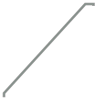

In [16]:
line_to_poly(internal[-1])